# Предсказание цены биткоина 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from prophet import Prophet

rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
matplotlib.rcParams.update({'font.size': 14})

Чтение и подготовка данных

In [2]:
df = pd.read_csv('BTC_USD_2021_2022.csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-19,31800.011719,31885.859375,30563.734375,30817.832031,30817.832031,20434789545
1,2021-07-20,30838.285156,31006.187500,29360.955078,29807.347656,29807.347656,23148267245
2,2021-07-21,29796.285156,32752.326172,29526.183594,32110.693359,32110.693359,28203024559
3,2021-07-22,32138.873047,32576.400391,31745.298828,32313.105469,32313.105469,19555230518
4,2021-07-23,32305.958984,33581.550781,32057.892578,33581.550781,33581.550781,22552046192
...,...,...,...,...,...,...,...
361,2022-07-15,20573.156250,21138.244141,20397.000000,20836.328125,20836.328125,25905575359
362,2022-07-16,20834.103516,21514.404297,20518.898438,21190.316406,21190.316406,24302954056
363,2022-07-17,21195.041016,21600.640625,20778.179688,20779.343750,20779.343750,22927802083
364,2022-07-18,20781.912109,22633.033203,20781.912109,22485.689453,22485.689453,39974475562


In [4]:
df = df.rename(columns=lambda x: x.strip())

In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
df = df.drop(['High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1)
df

,Date,Open
0,2021-07-19,31800.011719
1,2021-07-20,30838.285156
2,2021-07-21,29796.285156
3,2021-07-22,32138.873047
4,2021-07-23,32305.958984
...,...,...
361,2022-07-15,20573.156250
362,2022-07-16,20834.103516
363,2022-07-17,21195.041016
364,2022-07-18,20781.912109


In [7]:
df.Date = pd.to_datetime(df.Date)

График цены биткоина с 2021-07-19 по 2022-07-19

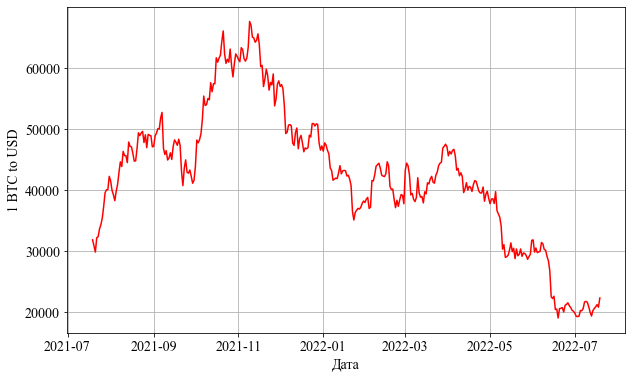

In [8]:
plt.figure(figsize=(10,6))
plt.plot(df.Date, df.Open, color='red')
plt.xlabel('Дата')
plt.ylabel('1 BTC to USD')
plt.grid()

In [9]:
df = df.rename(columns={'Date':'ds','Open':'y'})
df

,ds,y
0,2021-07-19,31800.011719
1,2021-07-20,30838.285156
2,2021-07-21,29796.285156
3,2021-07-22,32138.873047
4,2021-07-23,32305.958984
...,...,...
361,2022-07-15,20573.156250
362,2022-07-16,20834.103516
363,2022-07-17,21195.041016
364,2022-07-18,20781.912109


Предскажем цену биткоина на 20 дней

In [10]:
predictions = 20
train_df = df[:-predictions] 

In [11]:
train_df

,ds,y
0,2021-07-19,31800.011719
1,2021-07-20,30838.285156
2,2021-07-21,29796.285156
3,2021-07-22,32138.873047
4,2021-07-23,32305.958984
...,...,...
341,2022-06-25,21233.609375
342,2022-06-26,21496.494141
343,2022-06-27,21028.238281
344,2022-06-28,20731.544922


Создание модели и обучение

In [12]:
m = Prophet()
m.fit(train_df)

17:35:16 - cmdstanpy - INFO - Chain [1] start processing
17:35:16 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
future = m.make_future_dataframe(periods=predictions)
forecast = m.predict(future)

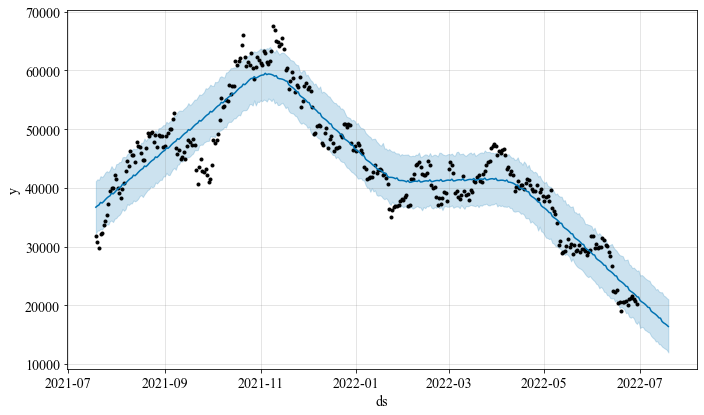

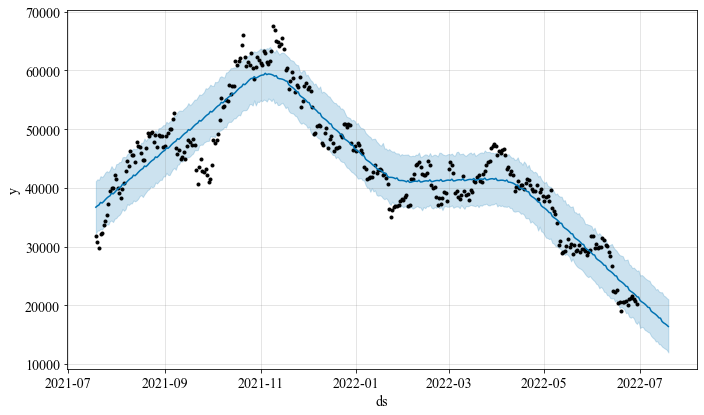

In [14]:
m.plot(forecast)

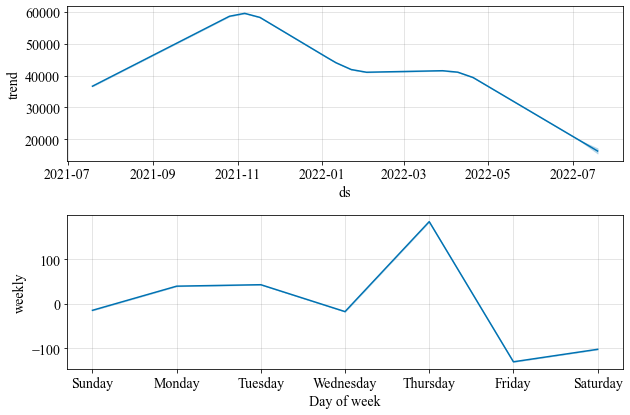

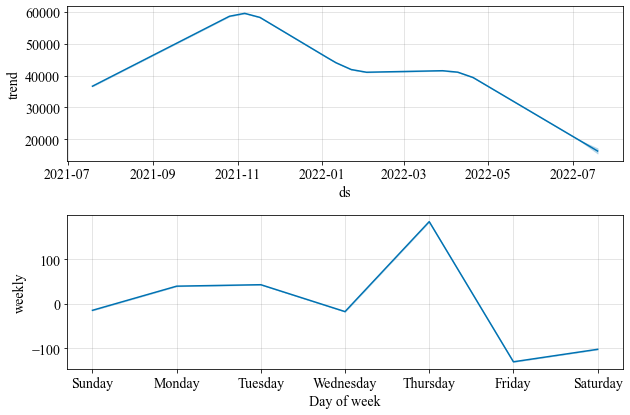

In [15]:
m.plot_components(forecast)

In [16]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-07-19,36657.957400,32199.425955,41121.303952,36657.957400,36657.957400,39.260530,39.260530,39.260530,39.260530,39.260530,39.260530,0.0,0.0,0.0,36697.217931
1,2021-07-20,36879.483328,32708.387153,41457.961095,36879.483328,36879.483328,42.539945,42.539945,42.539945,42.539945,42.539945,42.539945,0.0,0.0,0.0,36922.023272
2,2021-07-21,37101.009255,32724.630774,41352.420906,37101.009255,37101.009255,-17.855767,-17.855767,-17.855767,-17.855767,-17.855767,-17.855767,0.0,0.0,0.0,37083.153488
3,2021-07-22,37322.535183,33000.427100,41995.902024,37322.535183,37322.535183,184.153275,184.153275,184.153275,184.153275,184.153275,184.153275,0.0,0.0,0.0,37506.688458
4,2021-07-23,37544.061110,32908.091358,41814.606663,37544.061110,37544.061110,-130.579555,-130.579555,-130.579555,-130.579555,-130.579555,-130.579555,0.0,0.0,0.0,37413.481555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2022-07-15,17353.834364,12951.452012,22214.244098,16814.018274,17928.737100,-130.579555,-130.579555,-130.579555,-130.579555,-130.579555,-130.579555,0.0,0.0,0.0,17223.254808
362,2022-07-16,17097.635453,12756.238808,21647.733121,16499.310994,17753.549656,-102.547367,-102.547367,-102.547367,-102.547367,-102.547367,-102.547367,0.0,0.0,0.0,16995.088087
363,2022-07-17,16841.436543,12574.616589,21496.762051,16195.410098,17548.752427,-14.971061,-14.971061,-14.971061,-14.971061,-14.971061,-14.971061,0.0,0.0,0.0,16826.465483
364,2022-07-18,16585.237633,12407.041674,21213.181728,15883.026796,17357.929507,39.260530,39.260530,39.260530,39.260530,39.260530,39.260530,0.0,0.0,0.0,16624.498164


In [17]:
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df.set_index('ds'))

In [18]:
cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
cmp_df['p'] = 100*cmp_df['e']/cmp_df['y']
print('MAPE, относительная погрешность', np.mean(abs(cmp_df[-predictions:]['p'])))
print('MAE, абсолютная погрешность', np.mean(abs(cmp_df[-predictions:]['e'])))

MAPE, относительная погрешность 10.96051133334452
MAE, абсолютная погрешность 2286.0538230019056


Предсказание цены на 20 дней

In [19]:
forecast[-predictions:]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
346,2022-06-30,21196.818014,17247.538936,25946.836123,21196.818014,21196.818014,184.153275,184.153275,184.153275,184.153275,184.153275,184.153275,0.0,0.0,0.0,21380.971289
347,2022-07-01,20940.619104,16105.676812,25036.289980,20940.619104,20940.619104,-130.579555,-130.579555,-130.579555,-130.579555,-130.579555,-130.579555,0.0,0.0,0.0,20810.039549
348,2022-07-02,20684.420194,16323.162246,25157.620430,20684.420194,20685.991080,-102.547367,-102.547367,-102.547367,-102.547367,-102.547367,-102.547367,0.0,0.0,0.0,20581.872828
349,2022-07-03,20428.221284,16202.465581,24945.919605,20419.553488,20444.641516,-14.971061,-14.971061,-14.971061,-14.971061,-14.971061,-14.971061,0.0,0.0,0.0,20413.250223
350,2022-07-04,20172.022374,15793.501561,24646.271856,20148.929024,20213.076841,39.260530,39.260530,39.260530,39.260530,39.260530,39.260530,0.0,0.0,0.0,20211.282904
351,2022-07-05,19915.823464,15646.094658,24430.263509,19872.606939,19995.843621,42.539945,42.539945,42.539945,42.539945,42.539945,42.539945,0.0,0.0,0.0,19958.363409
352,2022-07-06,19659.624554,15438.335831,24257.678434,19580.175447,19781.249141,-17.855767,-17.855767,-17.855767,-17.855767,-17.855767,-17.855767,0.0,0.0,0.0,19641.768787
353,2022-07-07,19403.425644,15316.325867,24177.101116,19289.001527,19566.538016,184.153275,184.153275,184.153275,184.153275,184.153275,184.153275,0.0,0.0,0.0,19587.578919
354,2022-07-08,19147.226734,14778.846513,23601.258389,18998.460332,19354.597520,-130.579555,-130.579555,-130.579555,-130.579555,-130.579555,-130.579555,0.0,0.0,0.0,19016.647178
355,2022-07-09,18891.027824,14483.134964,23393.213723,18697.825448,19142.221266,-102.547367,-102.547367,-102.547367,-102.547367,-102.547367,-102.547367,0.0,0.0,0.0,18788.480457
